In [1]:
import pandas as pd
from neuralNetworkFromScratch import NeuralNetworkFromScratch
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
def min_max_scaler(series):
    normalized = (series - min(series)) / (max(series)-min(series))
    return normalized

# Example 1: Simple multiple classification

In [3]:
data = load_wine()
features = pd.DataFrame(data=data.data, columns=data.feature_names)
target = pd.DataFrame(data=data.target, columns=['class'])
df = pd.concat([features, target], axis=1)

In [4]:
for col in features.columns:
    features[col] = min_max_scaler(features[col])

In [5]:
# Train - Test Split
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.33, random_state=42)

## 3. Prediction

In [8]:
n_classes = train_y['class'].nunique()

In [9]:
model = NeuralNetworkFromScratch(layers_dims=[train_x.shape[1], 4, 2, n_classes], task='multiple_classification', learning_rate=1e-2, n_epochs=10000, print_cost=True)

Cost after iteration 0: 5.882838500747813
Cost after iteration 1000: 9.153093328910648
Cost after iteration 2000: 10.223066215596408
Cost after iteration 3000: 10.923489668720592
Cost after iteration 4000: 11.44616546938652
Cost after iteration 5000: 11.863280989596573
Cost after iteration 6000: 12.210287244794943
Cost after iteration 7000: 12.507303255056984
Cost after iteration 8000: 12.766865447716386
Cost after iteration 9000: 12.9973192821281
Cost after iteration 9999: 13.204304701853117


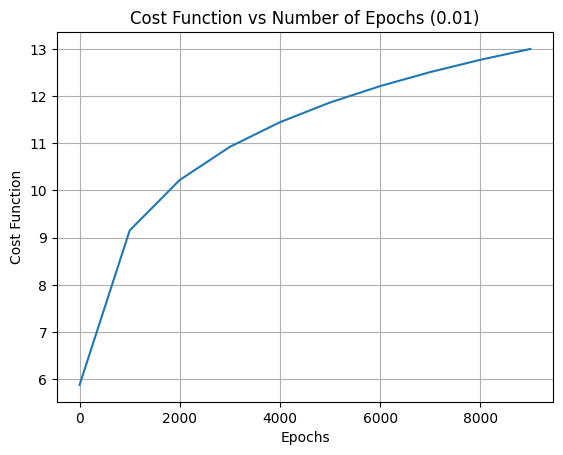

In [10]:
parameters, costs = model.fit(train_x, train_y, print_every=1000, plot_cost_function=True)

In [11]:
pred_train = model.predict(train_x, train_y)

In [12]:
a = model.predict(test_x, test_y)

In [71]:
Z = np.random.uniform(0,1e1, 5)

In [81]:
# softmax
sum_exp = np.exp(Z).sum()
A = np.exp(Z) / sum_exp
A

array([1.16531738e-03, 9.12801903e-01, 3.37681667e-02, 1.12076562e-04,
       5.21525363e-02])

In [12]:
AL = np.random.uniform(0,1,[3,119])
Y = np.round((np.random.uniform(0,1,[3,119])),0)
m = Y.shape[1]

In [13]:
cost = (1. / m) * (-Y* np.log(AL) - (1 - Y)* np.log(1 - AL))

3.0731787261176366